In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.modeling import models, fitting
fitter = fitting.LinearLSQFitter()
from scipy.ndimage import median_filter
from sklearn.preprocessing import MinMaxScaler

In [7]:
fname='../../SMC/Type1/LIN178/ADP.2023-01-09T23:22:14.152.fits'
fname1='../../SMC/Type1/LIN360/ADP.2020-08-14T15:43:54.025.fits'
fname2='../../SMC/Type1/OGLEJ005312.58-725533.6/ADP.2022-09-26T05:41:40.280.fits'
fname3='../../SMC/Type1/OGLEJ010838.56-723633.5/ADP.2014-10-07T08:35:09.440.fits'
mu_cent='../../SMC/Mu_Centauri/ADP.2016-09-21T11:56:32.916.fits'

In [9]:
#fits.getheader(fname1)

In [10]:
fits.info(fname1)

Filename: ../../SMC/Type1/LIN360/ADP.2020-08-14T15:43:54.025.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     983   ()      
  1  SPECTRUM      1 BinTableHDU     55   1R x 4C   [176719D, 176719E, 176719E, 176719E]   


In [11]:
#plt.figure(figsize=(20,20))
#plt.imshow(fits.getdata(fname3).T[600:800],norm='log',vmin=200,aspect=10)
xd1 = fits.getdata(fname1)
xd2 = fits.getdata(fname2)
xd3 = fits.getdata(fname3)
xd4 = fits.getdata(fname)
cent=fits.getdata(mu_cent)
xd2,cent

(FITS_rec([([4726.44663871, 4726.46088753, 4726.47513635, ..., 6834.98761849, 6835.00452723, 6835.02143597], [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,   0.      ], [  1.       ,   1.       ,   1.       , ...,   1.       ,   1.       ,   1.       ], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00], [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,  0.       ], [0.        , 0.        , 0.        , ..., 0.02676451, 0.02676458, 0.02676464])],
          dtype=(numpy.record, [('WAVE', '>f8', (131889,)), ('FLUX_REDUCED', '>f4', (131889,)), ('ERR_REDUCED', '>f4', (131889,)), ('BGFLUX_REDUCED', '>f4', (131889,)), ('FLUX', '>f4', (131889,)), ('ERR', '>f4', (131889,))])),
 FITS_rec([([3527.36999997, 3527.39999997, 3527.42999997, ..., 9216.26987281, 9216.29987281, 9216.32987281], [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,  1.95430803e+00,  1.91651344e+00,  0.00000000e+00], [nan, nan, na

In [12]:
scaler = MinMaxScaler()

In [40]:
#star 1
xd1_new=xd1['FLUX_REDUCED'][0][4145:-1719].tolist()
xd1_filt=median_filter(xd1_new,250)
lam1 = xd1['WAVE'][0][4145:-1719]

mask_alpha1=np.abs(6562.8-lam1)>40
mask_beta1=np.abs(4861.33333333333-lam1)>40
mask_gamma1=np.abs(4367.23-lam1)>50 #H_gamma está corrido
mask1=mask_alpha1&mask_beta1&mask_gamma1

#star 2
xd2_new=xd2['FLUX'][0][4145:-1719].tolist()
xd2_filt=median_filter(xd2_new,100)
lam2 = xd2['WAVE'][0][4145:-1719]

mask_alpha2=np.abs(6562.8-lam2)>40
mask_beta2=np.abs(4861.33333333333-lam2)>40
mask_gamma2=np.abs(4367.23-lam2)>50 #H_gamma está corrido
mask2=mask_alpha2&mask_beta2&mask_gamma2

#star 3
xd3_new=xd3['FLUX'][0][4145:-1719].tolist()
xd3_filt=median_filter(xd3_new,250)
lam3 = xd3['WAVE'][0][4145:-1719]

mask_alpha3=np.abs(6562.8-lam3)>40
mask_beta3=np.abs(4861.33333333333-lam3)>40
mask_gamma3=np.abs(4367.23-lam3)>50 #H_gamma está corrido
mask3=mask_alpha3&mask_beta3&mask_gamma3

#MuCen
cent_new=cent['FLUX'][0][4145:-1719].tolist()
cent_filt=median_filter(cent_new,250)
lamc = cent['WAVE'][0][4145:-1719]

mask_alphac=np.abs(6562.8-lamc)>40
mask_betac=np.abs(4861.33333333333-lamc)>40
mask_gammac=np.abs(4367.23-lamc)>50 #H_gamma está corrido
maskc=mask_alphac&mask_betac&mask_gammac

In [41]:
modelo1 = fitter(models.Chebyshev1D(25),lam1[mask1],xd1_filt[mask1])
modelo2 = fitter(models.Chebyshev1D(25),lam2[mask2],xd2_filt[mask2])
modelo3 = fitter(models.Chebyshev1D(25),lam3[mask3],xd3_filt[mask3])
modeloc = fitter(models.Chebyshev1D(25),lamc[maskc],cent_filt[maskc])

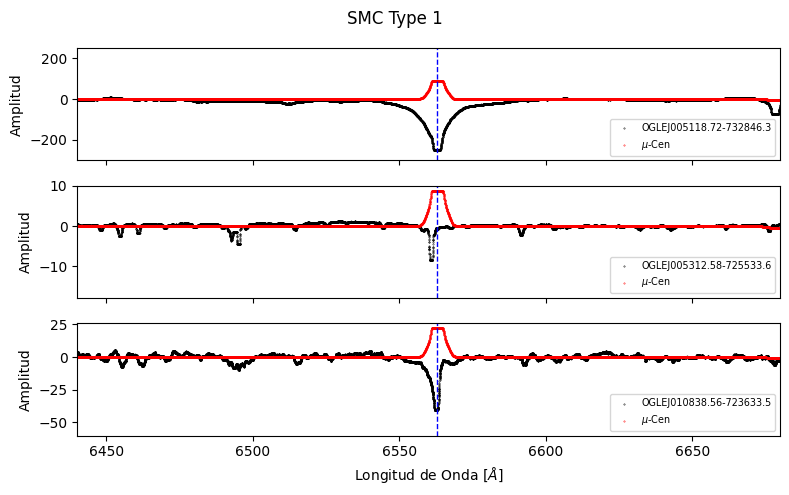

In [42]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 5))  # 5 rows, 1 column

# Plot each light curve
#axs[0].scatter(xd2['WAVE'][0]-4.5,scaler.fit_transform(xd2['FLUX_REDUCED'][0].reshape(-1, 1))*100, s=0.1, color='black',label='OGLEJ005118.72-732846.3')
#axs[0].scatter(cent['WAVE'][0],cent['FLUX'][0]+25,s=0.1, color='red')
#axs[1].scatter(xd3['WAVE'][0]-2,xd3['FLUX'][0], s=0.1, color='black',label='OGLEJ005312.58-725533.6')
#axs[1].scatter(cent['WAVE'][0],cent['FLUX'][0]+16,s=0.1, color='red')
#axs[2].scatter(xd4['WAVE'][0]-4.5,scaler.fit_transform(xd4['FLUX'][0].reshape(-1, 1))*100, s=0.1, color='black',label='OGLEJ010838.56-723633.5')
#axs[2].scatter(cent['WAVE'][0],cent['FLUX'][0]+20,s=0.1, color='red')

axs[0].scatter(lam1-4.5,xd1_filt-modelo1(lam1),s=0.1, color='black', label='OGLEJ005118.72-732846.3')
axs[0].scatter(lamc,(cent_filt-modeloc(lamc))*20,s=0.1, color='red',label=r'$\mu$-Cen')
axs[1].scatter(lam2-4.5,xd2_filt-modelo2(lam2), s=0.1, color='black',label='OGLEJ005312.58-725533.6')
axs[1].scatter(lamc,(cent_filt-modeloc(lamc))*2,s=0.1, color='red',label=r'$\mu$-Cen')
axs[2].scatter(lam3-4.5,xd3_filt-modelo3(lam3), s=0.1, color='black',label='OGLEJ010838.56-723633.5')
axs[2].scatter(lamc,(cent_filt-modeloc(lamc))*5,s=0.1, color='red',label=r'$\mu$-Cen')


# Labels
for ax in axs:
    ax.set_ylabel('Amplitud') 
    ax.axvline(x=6562.8, color='blue', linestyle='--', linewidth=1)
    ax.legend(loc='lower right', fontsize='x-small')
axs[-1].set_xlabel(r'Longitud de Onda [$\AA$]')
axs[-1].set_xlim(6440, 6680)
axs[0].set_ylim(-300, 250)
#axs[1].set_ylim(5, 25)
#axs[2].set_ylim(10, 35)

fig.suptitle('SMC Type 1')
plt.tight_layout()
plt.savefig('SMC_Type1')
plt.show()